# Image Vectorisation

Similar to text vectorisation, image vectorisation is a matter of turning an image into a fixed size vector.

This is useful because you can compare vectors using functions like `cosine_similarity` to compare images to other images or even to text.

This is how OpenAI's CLIP can perform zero-shot classification.

In fact, CLIP is what we will be using for this task.

In [1]:
import backprop

iv = backprop.ImageVectorisation("clip")

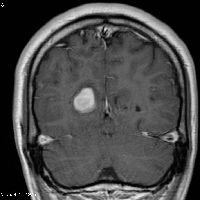

In [2]:
from PIL import Image

brain_img_path = "data/brain.jpeg"
brain_img = Image.open(brain_img_path).resize((200, 200), Image.NEAREST)
brain_img

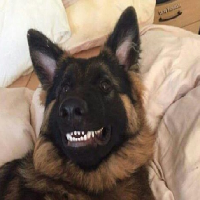

In [3]:
dog_img_path = "data/german_shepherd.jpg"
dog_img = Image.open(dog_img_path).resize((200, 200), Image.NEAREST)
dog_img

In [4]:
brain_vec = iv(brain_img_path)
brain_vec[:20]

[0.2337646484375,
 -0.3037109375,
 -0.0303497314453125,
 0.0128326416015625,
 -0.1806640625,
 -0.20703125,
 -0.12481689453125,
 0.339599609375,
 0.273193359375,
 -0.42041015625,
 0.55126953125,
 0.1417236328125,
 0.310791015625,
 -0.07855224609375,
 -0.270751953125,
 -0.2147216796875,
 0.73681640625,
 -0.0836181640625,
 0.0271453857421875,
 0.015960693359375]

A vector on its own does not look very exciting. It is just a list of numbers. Let's compare the vectors.

In [5]:
dog_vec = iv(dog_img_path)

In [6]:
backprop.cosine_similarity(brain_vec, dog_vec)

0.47793468832969666

We got a similarity score for how similar the two images are. If we had many more images, then this is enough to implement image to image search.

The cool thing about CLIP is that it can also vectorise text. This means that we can compare text vectors with image vectors!

In [7]:
tv = backprop.TextVectorisation("clip")

In [8]:
import operator
def search_image(text):
    images = [dog_img, brain_img]
    img_vecs = [dog_vec, brain_vec]
    text_vec = tv(text)
    img_scores = backprop.cosine_similarity(text_vec, img_vecs)
    index, value = max(enumerate(img_scores), key=operator.itemgetter(1))
    
    return images[index]

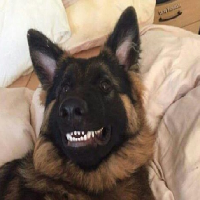

In [9]:
search_image("dog")

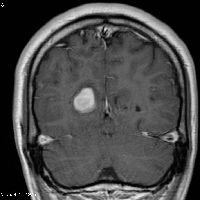

In [10]:
search_image("brain")

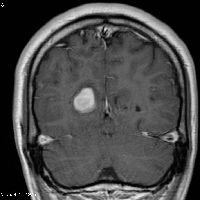

In [11]:
search_image("medical image")

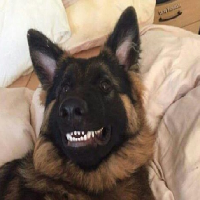

In [12]:
search_image("beautiful smile")